In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Analysis of variance (ANOVA)

ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means. 

In [4]:
A=[30,40,50,60] 
B=[25,30,50,55]
C=[25,30,40,45]
D=[43,45,45,47] 
E=[37,40,40,43]
F=[34,35,35,36]

In [15]:
from scipy.stats import f_oneway

In [16]:
f_oneway(A,B,C)

F_onewayResult(statistic=0.6428571428571429, pvalue=0.5483227164089495)

In [17]:
f_oneway(D,E,F)

F_onewayResult(statistic=32.14285714285714, pvalue=7.970844367886858e-05)

In [18]:
G1_df=pd.DataFrame()
df1=pd.DataFrame({'group':'A','age':[30,40,50,60]})
df2=pd.DataFrame({'group':'B','age':[25,30,50,55]})
df3=pd.DataFrame({'group':'C','age':[25,30,40,45]})
G1_df=G1_df.append(df1)
G1_df=G1_df.append(df2)
G1_df=G1_df.append(df3)

In [20]:
G1_df

,group,age
0,A,30
1,A,40
2,A,50
3,A,60
0,B,25
1,B,30
2,B,50
3,B,55
0,C,25
1,C,30


In [42]:
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

In [ ]:
m1 = ols('age ~ group', data = G1_df).fit()
aov_table = anova_lm(m1, typ=1)
print(aov_table)

           df  sum_sq     mean_sq         F    PR(>F)
group     2.0   200.0  100.000000  0.642857  0.548323
Residual  9.0  1400.0  155.555556       NaN       NaN


In [22]:
G2_df=pd.DataFrame()
Df1=pd.DataFrame({'group':'D','age':[43,45,45,47]})
Df2=pd.DataFrame({'group':'E','age':[37,40,40,43]})
Df3=pd.DataFrame({'group':'F','age':[34,35,35,36]})
G2_df=G2_df.append(Df1)
G2_df=G2_df.append(Df2)
G2_df=G2_df.append(Df3)

In [23]:
G2_df

,group,age
0,D,43
1,D,45
2,D,45
3,D,47
0,E,37
1,E,40
2,E,40
3,E,43
0,F,34
1,F,35


In [25]:
mod = ols('age ~ group', data = G2_df).fit()
aov_table =anova_lm(mod, typ=1)
print(aov_table)

           df  sum_sq     mean_sq          F   PR(>F)
group     2.0   200.0  100.000000  32.142857  0.00008
Residual  9.0    28.0    3.111111        NaN      NaN


In [ ]:
oa=(np.sum(A)+np.sum(B)+np.sum(C))/12
oa

40.0

In [5]:
oa=(np.sum(D)+np.sum(E)+np.sum(F))/12
oa

40.0

In [6]:
Abar=np.mean(A)
Bbar=np.mean(B)
Cbar=np.mean(C)
Dbar=np.mean(D)
Ebar=np.mean(E)
Fbar=np.mean(F)

In [7]:
Avar=np.var(A,ddof=1)
Bvar=np.var(B,ddof=1)
Cvar=np.var(C,ddof=1)
Dvar=np.var(D,ddof=1)
Evar=np.var(E,ddof=1)
Fvar=np.var(F,ddof=1)

In [8]:
#MSTR Calculation (between sample variability)
sstr=len(A)*(Abar-oa)**2+len(B)*(Bbar-oa)**2+len(C)*(Cbar-oa)**2
sstr

200.0

In [9]:
#MSTR Calculation (between sample variability)
sstr=len(D)*(Dbar-oa)**2+len(E)*(Ebar-oa)**2+len(F)*(Fbar-oa)**2
sstr

200.0

In [10]:
df1=3-1
mstr=sstr/df1
mstr

100.0

In [11]:
#MSE Calculation (within sample variability)
#Within Sample Variability (MSE)=SSE/dof             
sse=(len(A)-1)*Avar+(len(B)-1)*Bvar+(len(C)-1)*Cvar
df2=12-3
print(sse)
print(df2)
sse/df2

1400.0
9


155.55555555555554

In [12]:
F_abc=100/155.55555555555554
F_abc

0.6428571428571429

In [13]:
#MSE Calculation (within sample variability)
#Within Sample Variability (MSE)=SSE/dof             
sse=(len(D)-1)*Dvar+(len(E)-1)*Evar+(len(F)-1)*Fvar
df2=12-3
print(sse)
print(df2)
sse/df2

28.0
9


3.111111111111111

In [14]:
F_def=100/3.1111111111
F_def

32.14285714297194

* Verify does the salary varies with respect to Dept
* Verify does the salary varies with respect to job_level


In [26]:
A=pd.read_csv('/content/drive/My Drive/MSD/fair_pay_data.csv',index_col=0)
A.head()

,department,salary,new_hire,job_level
employee_id,,,,
1,Sales,103263.63550,No,Salaried
2,Engineering,80708.64104,No,Hourly
4,Engineering,60737.04786,Yes,Hourly
5,Engineering,99116.32328,Yes,Salaried
7,Engineering,51021.64386,No,Hourly


In [27]:
A['department'].value_counts()

Engineering    961
Sales          446
Finance         63
Name: department, dtype: int64

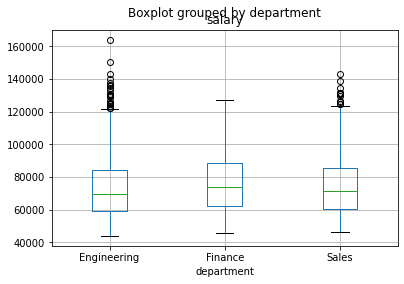

In [31]:
A.boxplot(column='salary',by='department')

In [28]:
A['job_level'].value_counts()

Hourly      1039
Salaried     326
Manager      105
Name: job_level, dtype: int64

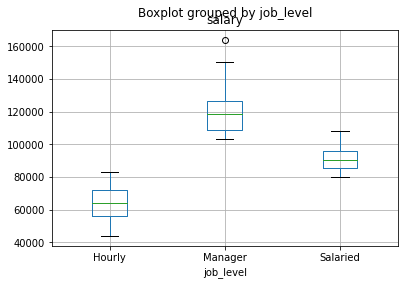

In [32]:
A.boxplot(column='salary',by='job_level')

In [37]:
g1=A['salary'][A['department']=='Engineering']
g2=A['salary'][A['department']=='Sales']
g3=A['salary'][A['department']=='Finance']

In [38]:
g1.mean(),g2.mean(),g3.mean()

(73560.73841627462, 75039.9375778251, 76651.66425492064)

In [39]:
g1=A['salary'][A['job_level']=='Hourly']
g2=A['salary'][A['job_level']=='Salaried']
g3=A['salary'][A['job_level']=='Manager']

In [40]:
g1.mean(),g2.mean(),g3.mean()

(64251.24077572664, 91143.073100092, 119229.1012304762)

In [43]:
m1 = ols('salary ~ department+job_level', data = A).fit()
aov_table = anova_lm(m1, typ=1)
print(aov_table)

                df        sum_sq       mean_sq            F    PR(>F)
department     2.0  1.081095e+09  5.405473e+08     6.774632  0.001179
job_level      2.0  4.084238e+11  2.042119e+11  2559.369839  0.000000
Residual    1465.0  1.168922e+11  7.978992e+07          NaN       NaN


In [44]:
data = pd.read_csv("/content/drive/My Drive/Statistics Mahesh Anand/Bank.csv")
data.shape

(264, 8)

In [45]:
data.head()

,User I.D,Age,Income,Income2,Deposit,Deposit2,Customer_type,Deposit_Scheme
0,ACX570081,26,32900,20230,14805.0,11935.7,Irregular,Hal-Yearly
1,ACX570082,43,37390,21410,19442.8,10276.8,Regular,Quaterly
2,ACX570083,35,11300,22290,5989.0,9361.8,Irregular,Monthly
3,ACX570084,27,41680,26970,19589.6,15912.3,Irregular,Quaterly
4,ACX570085,42,27170,27220,14943.5,11160.2,Regular,Quaterly


In [46]:
bins = [0, 18, 24, 30, 40, 48, np.inf]
names = ["Group-A", "Group-B", "Group-C", "Group-D" , "Group-E" , "Group-F" ]

data['Age_Group'] = pd.cut(data.Age, bins, labels=names)

In [47]:
data.head()

,User I.D,Age,Income,Income2,Deposit,Deposit2,Customer_type,Deposit_Scheme,Age_Group
0,ACX570081,26,32900,20230,14805.0,11935.7,Irregular,Hal-Yearly,Group-C
1,ACX570082,43,37390,21410,19442.8,10276.8,Regular,Quaterly,Group-E
2,ACX570083,35,11300,22290,5989.0,9361.8,Irregular,Monthly,Group-D
3,ACX570084,27,41680,26970,19589.6,15912.3,Irregular,Quaterly,Group-C
4,ACX570085,42,27170,27220,14943.5,11160.2,Regular,Quaterly,Group-E


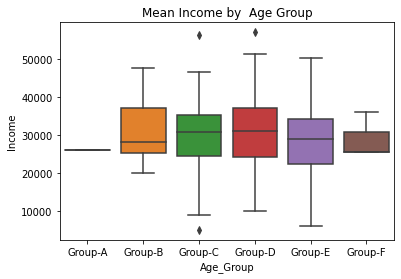

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = "Age_Group", y = "Income", data = data)
plt.title('Mean Income by  Age Group')
plt.show()

In [49]:
import statsmodels.api as sm
from   statsmodels.formula.api import ols
 
mod = ols('Income ~ Age_Group', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq     df         F    PR(>F)
Age_Group  1.806153e+08    5.0  0.405621  0.844716
Residual   2.297650e+10  258.0       NaN       NaN


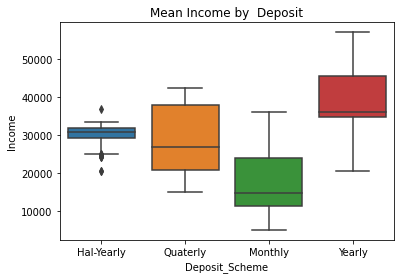

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = "Deposit_Scheme", y = "Income", data = data)
plt.title('Mean Income by  Deposit')
plt.show()

In [51]:
import statsmodels.api as sm
from   statsmodels.formula.api import ols
 
mod = ols('Income ~ Deposit_Scheme', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                      sum_sq     df         F        PR(>F)
Deposit_Scheme  7.799853e+09    3.0  44.01742  4.891310e-23
Residual        1.535727e+10  260.0       NaN           NaN


####Conclussion :

As the p-value (4.891310e-23) is less than alpha (0.05) implies,We reject Null hypothesis.That means mean Income over different Deposit Scheme are not same or in other words different Deposit Schemes are influenced by the Income & the purchasing power of the investor. 

#### Tukey Test
Now,we will try to find out for which Deposit scheme the mean income are not same.For that,we 
will conduct a Tukey test.

Tukey test gives us a way to peep inside the data and find out where the variation is. It will give the permutation combination of several classes and 'reject' column help us identify the variation between the groups.

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(data['Income'],data['Deposit_Scheme']))

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1    group2   meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------
Hal-Yearly  Monthly -11265.787  0.001 -15750.5592 -6781.0149   True
Hal-Yearly Quaterly -1084.7775 0.7602   -4081.533  1911.9779  False
Hal-Yearly   Yearly  9037.4893  0.001   5420.7781 12654.2006   True
   Monthly Quaterly 10181.0095  0.001   5923.9097 14438.1093   True
   Monthly   Yearly 20303.2764  0.001  15589.1534 25017.3993   True
  Quaterly   Yearly 10122.2668  0.001    6792.054 13452.4797   True
-------------------------------------------------------------------


####Conclussion:
"reject = True" implies there exists significant difference in the Group mean.

Apart from the mean Income of Half-Yearly and Quaterly Deposite Scheme all other Deposit Scheme has significant difference.